In [1]:
import pickle
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [77]:
ms = ['Ideal', 'Unmitigated', 'ZNE', 'RF', 'MLP', 'GNN', 'OLS']
tmp = ['L2_ideal', 'L2_noisy', 'L2_zne', 'L2_rfr_list', 'L2_mlp', 'L2_gnn', 'L2_ols_full']
cols2ms = {t: ms[i] for i, t in enumerate(tmp)}
color_ind = [2, 0, 1, 3, 4, 5, 6]
colors = {x: sns.color_palette()[ind] for _, (ind, x) in enumerate(zip(color_ind, ms))}
colors.update({'RF Mimicking ZNE': colors['RF']})
colors.update({'RF-ZNE': colors['RF']})

In [3]:
sns.color_palette()
cols2ms;

# Random Circuits

In [154]:
with open('/Users/haoranliao/GitHub/blackwater/docs/paper_figures/random_circuits.pk', 'rb') as file:
    loaded = pickle.load(file)
df = loaded['df']

In [155]:
colors_copy = {x: colors[cols2ms[x]] for i, x in enumerate(['L2_noisy', 'L2_zne', 'L2_ols_full', 'L2_rfr_list', 'L2_mlp', 'L2_gnn'])}

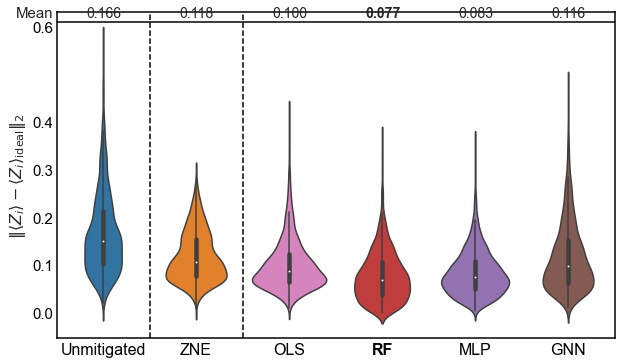

In [156]:
fs = 16
mpl.rc('xtick', labelsize=15)
mpl.rc('ytick', labelsize=15)
mpl.rc('font', weight='normal')
plt.style.use({'figure.facecolor':'white'})
plt.figure(figsize=(10, 6))
ax = sns.violinplot(data=df[['L2_noisy', 'L2_zne', 'L2_ols_full', 'L2_rfr_list', 'L2_mlp', 'L2_gnn']], palette=colors_copy)#, errorbar=('ci', 95))
x_tick_labels = ax.get_xticklabels()
x_tick_labels[3].set_weight('bold')
ax.set_xticklabels(x_tick_labels)
ax.set_xticklabels(['Unmitigated', 'ZNE', 'OLS', 'RF', 'MLP', 'GNN'], fontsize=fs)
plt.ylabel(r'$\Vert \langle Z_i \rangle - \langle Z_i \rangle_{\mathrm{ideal}} \Vert_2$', fontsize=fs)
# plt.ylim([-0.04, 0.6])
ymin, ymax = ax.get_ylim()
xmin, xmax = ax.get_xlim()
plt.ylim([ymin, ymax])
plt.xlim([xmin, xmax])
ax.grid(False)
plt.vlines(x=0.5, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed')
plt.vlines(x=1.5, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed')
plt.hlines(y=0.61, xmin=xmin, xmax=xmax, colors='black', linestyles='solid')

for a in [ax]:
    a.set_yticks(np.arange(0, 0.7, 0.1))
    a.tick_params(direction="in")
    for axis in ['top','bottom','left','right']:
        a.spines[axis].set_linewidth(1.5)
        a.spines[axis].set_color('black')

for i, col in enumerate(['L2_noisy', 'L2_zne', 'L2_ols_full', 'L2_rfr_list', 'L2_mlp', 'L2_gnn']):
    if col != 'L2_rfr_list':
        plt.text(i-0.18, 0.62, '%.3f'%round(np.mean(df[col]), 3), fontsize=fs-2)
    else:
        plt.text(i-0.18, 0.62, '%.3f'%round(np.mean(df[col]), 3), fontsize=fs-2, weight='bold')

plt.text(-0.94, 0.62, 'Mean', fontsize=fs-1)
tmp = ax.yaxis.get_majorticklabels()
tmp[-2] = tmp[-2].set_text('2')
ax.set_yticklabels(tmp)

plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig("/Users/haoranliao/GitHub/blackwater/docs/paper_figures/random_circuits.pdf", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

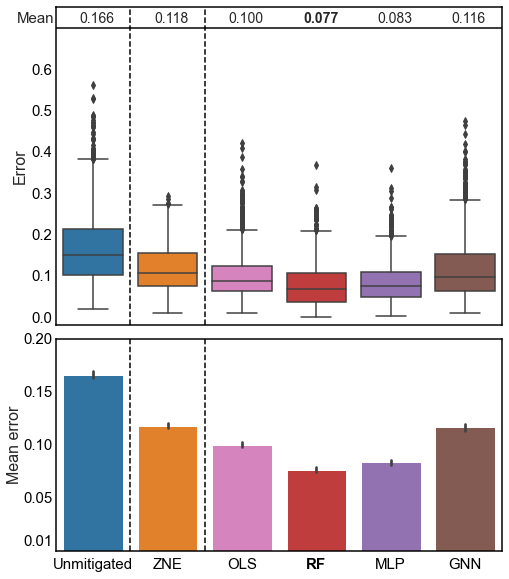

In [185]:
fs = 16
mpl.rc('xtick', labelsize=15)
mpl.rc('ytick', labelsize=15)
mpl.rc('font', weight='normal')
plt.style.use({'figure.facecolor':'white'})
fig = plt.figure(figsize=(8, 10))
gs = gridspec.GridSpec(2, 1, height_ratios=[1.5, 1])
ax = [plt.subplot(gs[i]) for i in range(2)]
sns.boxplot(data=df[['L2_noisy', 'L2_zne', 'L2_ols_full', 'L2_rfr_list', 'L2_mlp', 'L2_gnn']], palette=colors_copy, ax=ax[0])#, errorbar=('ci', 95))
# ax[0].set_ylabel(r'$\Vert \langle \hat{Z} \rangle - \langle \hat{Z} \rangle_{\mathrm{ideal}} \Vert_2$', fontsize=fs)
ax[0].set_ylabel('Error', fontsize=fs)
ax[0].set_ylim([-0.02, 0.75])
ymin, ymax = ax[0].get_ylim()
xmin, xmax = ax[0].get_xlim()
ax[0].set_ylim([ymin, ymax])
ax[0].set_xlim([xmin, xmax])
ax[0].vlines(x=0.5, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed')
ax[0].vlines(x=1.5, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed')
ax[0].hlines(y=0.7, xmin=xmin, xmax=xmax, colors='black', linestyles='solid')
ax[0].set_yticks(np.arange(0, 0.7, 0.1))

sns.barplot(data=df[['L2_noisy', 'L2_zne', 'L2_ols_full', 'L2_rfr_list', 'L2_mlp', 'L2_gnn']], palette=colors_copy, ax=ax[1], errorbar=('ci', 95))
# ax[1].set_ylabel(r'Mean $\Vert \langle \hat{Z} \rangle - \langle \hat{Z} \rangle_{\mathrm{ideal}} \Vert_2$', fontsize=fs, labelpad=1)
ax[1].set_ylabel('Mean error', fontsize=fs, labelpad=1)
ax[1].set_yticks([0.01, 0.05, 0.1, 0.15, 0.2])
ymin, ymax = ax[1].get_ylim()
ax[1].set_ylim([ymin, ymax])
ax[1].set_xlim([xmin, xmax])
ax[1].vlines(x=0.5, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed')
ax[1].vlines(x=1.5, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed')

for a in ax:
    a.tick_params(direction="in")
    a.grid(False)
    for axis in ['top','bottom','left','right']:
        a.spines[axis].set_linewidth(1.5)
        a.spines[axis].set_color('black')

y_text = 0.498
for i, col in enumerate(['L2_noisy', 'L2_zne', 'L2_ols_full', 'L2_rfr_list', 'L2_mlp', 'L2_gnn']):
    if col != 'L2_rfr_list':
        plt.text(i-0.18, y_text, '%.3f'%round(np.mean(df[col]), 3), fontsize=fs-2)
    else:
        plt.text(i-0.18, y_text, '%.3f'%round(np.mean(df[col]), 3), fontsize=fs-2, weight='bold')

plt.text(-1.03, y_text, 'Mean', fontsize=fs-1)
# tmp = ax[0].yaxis.get_majorticklabels()
# tmp[-1] = tmp[-1].set_text('2')
# ax[0].set_yticklabels(tmp)

x_tick_labels = ax[1].get_xticklabels()
x_tick_labels[3].set_weight('bold')
ax[1].set_xticklabels(x_tick_labels)
ax[1].set_xticklabels(['Unmitigated', 'ZNE', 'OLS', 'RF', 'MLP', 'GNN'], fontsize=fs-1)
ax[1].tick_params(axis='x', which='major', pad=7)
ax[0].set_xticklabels([])

plt.subplots_adjust(wspace=0, hspace=0.05)
plt.savefig("/Users/haoranliao/GitHub/blackwater/docs/paper_figures/random_circuits_2.pdf", dpi=300, bbox_inches='tight', transparent=False)
plt.show()

# Ising, no readout error

In [5]:
with open('/Users/haoranliao/GitHub/blackwater/docs/paper_figures/no_readout_single_ising.pk', 'rb') as file:
    loaded = pickle.load(file)

exp_Z_all_ideal_no_readout = loaded['exp_Z_all_ideal']
exp_Z_all_noisy_no_readout = loaded['exp_Z_all_noisy']
exp_Z_all_mitigated_dict_no_readout = loaded['exp_Z_all_mitigated_dict']
models_no_readout = loaded['models']

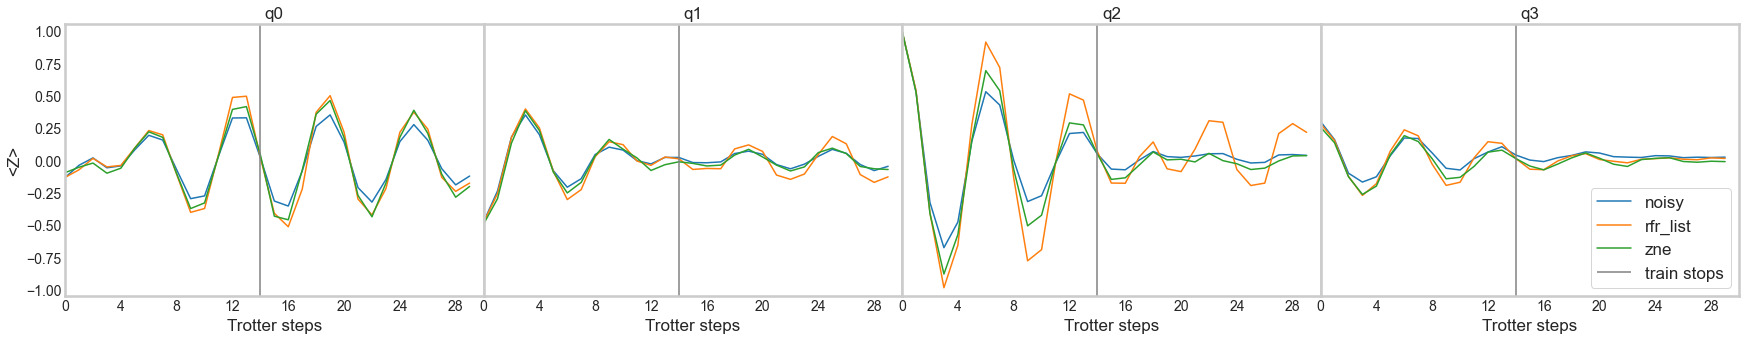

In [6]:
import matplotlib as mpl
ms, fs, lw, elw, cs = 9, 17, 2.5, 2, 0
mpl.rc('xtick', labelsize=14)
mpl.rc('ytick', labelsize=14)
mpl.rc('font', weight='normal')

fig = plt.figure(figsize=(30, 5))
ax = [fig.add_subplot(1,4,i+1) for i in range(4)]
plt.style.use({'figure.facecolor':'white'})

for q in range(4):
    # ax[q].plot(-exp_Z_all_ideal_no_readout[:, q], label='ideal')
    ax[q].plot(-exp_Z_all_noisy_no_readout[:, q], label='noisy')
    for key, val in exp_Z_all_mitigated_dict_no_readout.items():
        if models_no_readout[key] in [
            # 'gnn',
            # 'mlp',
            # 'ols_full',
            'rfr_list',
            'zne'
        ]:
            ax[q].plot(-val[:, q], label=f'{models_no_readout[key]}')
    ax[q].vlines(x=14, ymin=-2, ymax=2, color='gray', label = 'train stops')
    ax[q].grid(False)

for a in ax[1:]:
    a.set_yticklabels([])
for a in ax:
    a.tick_params(direction="in")
    a.set_ylim([-1.05, 1.05])
    a.set_xlim([0, 30])
    a.set_xlabel('Trotter steps', fontsize=fs)
    a.set_xticks(np.arange(0, 29, 4))
for a in ax:
    for axis in ['top','bottom','left','right']:
        a.spines[axis].set_linewidth(2.6)

for q in range(4):
    ax[q].set_title(f'q{q}', fontsize=fs)
plt.subplots_adjust(wspace=0, hspace=0)
plt.legend(loc='lower right', fontsize=fs)
ax[0].set_ylabel(f'<Z>', fontsize=fs)
plt.show()

# Ising, incoherent noise

In [7]:
with open('/Users/haoranliao/GitHub/blackwater/docs/paper_figures/incoherent_single_ising.pk', 'rb') as file:
    loaded = pickle.load(file)

exp_Z_all_ideal_incoherent = loaded['exp_Z_all_ideal']
exp_Z_all_noisy_incoherent = loaded['exp_Z_all_noisy']
exp_Z_all_mitigated_dict_incoherent = loaded['exp_Z_all_mitigated_dict']
models_incoherent = loaded['models']

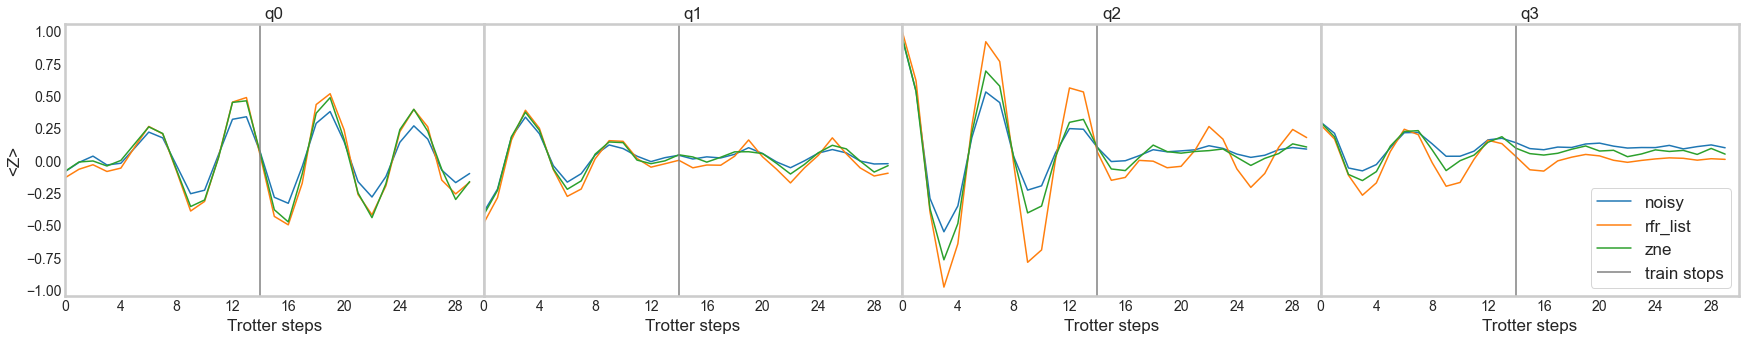

In [35]:
import matplotlib as mpl
ms, fs, lw, elw, cs = 9, 17, 2.5, 2, 0
mpl.rc('xtick', labelsize=14)
mpl.rc('ytick', labelsize=14)
mpl.rc('font', weight='normal')

fig = plt.figure(figsize=(30, 5))
ax = [fig.add_subplot(1,4,i+1) for i in range(4)]
plt.style.use({'figure.facecolor':'white'})

for q in range(4):
    # ax[q].plot(-exp_Z_all_ideal_incoherent[:, q], label='ideal')
    ax[q].plot(-exp_Z_all_noisy_incoherent[:, q], label='noisy')
    for key, val in exp_Z_all_mitigated_dict_incoherent.items():
        if models_incoherent[key] in [
            # 'gnn',
            # 'mlp',
            # 'ols_full',
            'rfr_list',
            'zne'
        ]:
            ax[q].plot(-val[:, q], label=f'{models_incoherent[key]}')
    ax[q].vlines(x=14, ymin=-2, ymax=2, color='gray', label = 'train stops')
    ax[q].grid(False)

for a in ax[1:]:
    a.set_yticklabels([])
for a in ax:
    a.tick_params(direction="in")
    a.set_ylim([-1.05, 1.05])
    a.set_xlim([0, 30])
    a.set_xlabel('Trotter steps', fontsize=fs)
    a.set_xticks(np.arange(0, 29, 4))
for a in ax:
    for axis in ['top','bottom','left','right']:
        a.spines[axis].set_linewidth(2.6)

for q in range(4):
    ax[q].set_title(f'q{q}', fontsize=fs)
plt.subplots_adjust(wspace=0, hspace=0)
plt.legend(loc='lower right', fontsize=fs)
ax[0].set_ylabel(f'<Z>', fontsize=fs)
plt.show()

# Ising, coherent noise

In [8]:
with open('/Users/haoranliao/GitHub/blackwater/docs/paper_figures/coherent_single_ising.pk', 'rb') as file:
    loaded = pickle.load(file)

exp_Z_all_ideal_coherent = loaded['exp_Z_all_ideal']
exp_Z_all_noisy_coherent = loaded['exp_Z_all_noisy']
exp_Z_all_mitigated_dict_coherent = loaded['exp_Z_all_mitigated_dict']
models_coherent = loaded['models']

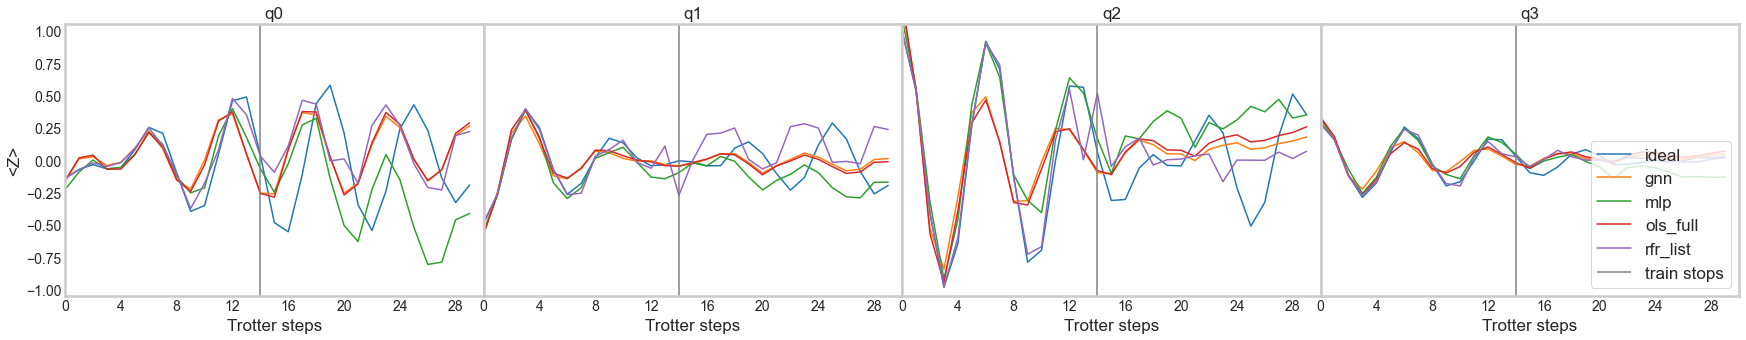

In [37]:
import matplotlib as mpl
ms, fs, lw, elw, cs = 9, 17, 2.5, 2, 0
mpl.rc('xtick', labelsize=14)
mpl.rc('ytick', labelsize=14)
mpl.rc('font', weight='normal')

fig = plt.figure(figsize=(30, 5))
ax = [fig.add_subplot(1,4,i+1) for i in range(4)]
plt.style.use({'figure.facecolor':'white'})

for q in range(4):
    ax[q].plot(-exp_Z_all_ideal_coherent[:, q], label='ideal')
    # ax[q].plot(-exp_Z_all_noisy_coherent[:, q], label='noisy')
    for key, val in exp_Z_all_mitigated_dict_coherent.items():
        if models_coherent[key] in [
            'gnn',
            'mlp',
            'ols_full',
            'rfr_list',
            # 'zne'
        ]:
            ax[q].plot(-val[:, q], label=f'{models_coherent[key]}')
    ax[q].vlines(x=14, ymin=-2, ymax=2, color='gray', label = 'train stops')
    ax[q].grid(False)

for a in ax[1:]:
    a.set_yticklabels([])
for a in ax:
    a.tick_params(direction="in")
    a.set_ylim([-1.05, 1.05])
    a.set_xlim([0, 30])
    a.set_xlabel('Trotter steps', fontsize=fs)
    a.set_xticks(np.arange(0, 29, 4))
for a in ax:
    for axis in ['top','bottom','left','right']:
        a.spines[axis].set_linewidth(2.6)

for q in range(4):
    ax[q].set_title(f'q{q}', fontsize=fs)
plt.subplots_adjust(wspace=0, hspace=0)
plt.legend(loc='lower right', fontsize=fs)
ax[0].set_ylabel(f'<Z>', fontsize=fs)
plt.show()

# Ising, no readout error

In [9]:
with open('/Users/haoranliao/GitHub/blackwater/docs/paper_figures/no_readout_over_depths.pk', 'rb') as file:
    loaded = pickle.load(file)
df_mean_no_readout = loaded['df_mean']
df_ste_no_readout = loaded['df_ste']
df_no_readout = loaded['df']

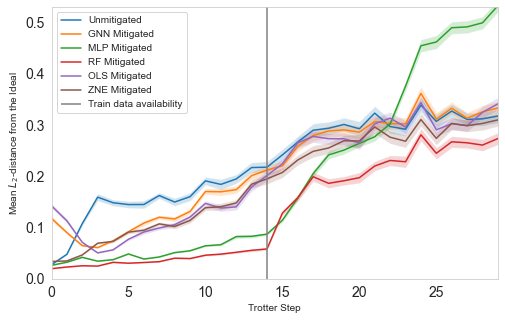

In [39]:
plt.style.use({'figure.facecolor':'white'})
plt.figure(figsize=(8, 5))
steps = sorted(set(df_no_readout.step))
legend_labels = ['Unmitigated', 'GNN Mitigated', 'MLP Mitigated', 'RF Mitigated', 'OLS Mitigated', 'ZNE Mitigated']
for i, col in enumerate(['L2_noisy', 'L2_gnn', 'L2_mlp', 'L2_rfr_list', 'L2_ols_full', 'L2_zne']):
    plt.plot(steps, df_mean_no_readout[col], label=legend_labels[i])
    plt.fill_between(x=steps, y1=df_mean_no_readout[col]-df_ste_no_readout[col], y2=df_mean_no_readout[col]+df_ste_no_readout[col], alpha=0.2)
plt.xlabel('Trotter Step')
plt.ylabel(r'Mean $L_2$-distance from the Ideal')
plt.ylim([0, 0.53])
plt.xlim([0, 29])
plt.vlines(x=14, ymin=0, ymax=1, color='gray', label='Train data availability')
plt.legend()
plt.grid(None)
plt.show()

# Ising, incoherent noise

In [10]:
with open('/Users/haoranliao/GitHub/blackwater/docs/paper_figures/incoherent_over_depths.pk', 'rb') as file:
    loaded = pickle.load(file)
df_mean_incoherent = loaded['df_mean']
df_ste_incoherent = loaded['df_ste']
df_incoherent = loaded['df']

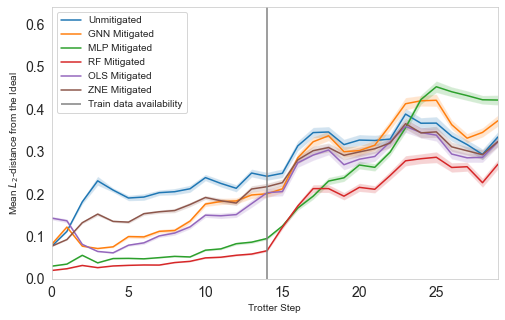

In [41]:
plt.style.use({'figure.facecolor':'white'})
plt.figure(figsize=(8, 5))
steps = sorted(set(df_incoherent.step))
legend_labels = ['Unmitigated', 'GNN Mitigated', 'MLP Mitigated', 'RF Mitigated', 'OLS Mitigated', 'ZNE Mitigated']
for i, col in enumerate(['L2_noisy', 'L2_gnn', 'L2_mlp', 'L2_rfr_list', 'L2_ols_full', 'L2_zne']):
    plt.plot(steps, df_mean_incoherent[col], label=legend_labels[i])
    plt.fill_between(x=steps, y1=df_mean_incoherent[col]-df_ste_incoherent[col], y2=df_mean_incoherent[col]+df_ste_incoherent[col], alpha=0.2)
plt.xlabel('Trotter Step')
plt.ylabel(r'Mean $L_2$-distance from the Ideal')
plt.ylim([0, 0.64])
plt.xlim([0, 29])
plt.vlines(x=14, ymin=0, ymax=1, color='gray', label='Train data availability')
plt.legend()
plt.grid(None)
plt.show()

# Ising, coherent

In [11]:
with open('/Users/haoranliao/GitHub/blackwater/docs/paper_figures/coherent_over_depths.pk', 'rb') as file:
    loaded = pickle.load(file)
df_mean_coherent = loaded['df_mean']
df_ste_coherent = loaded['df_ste']
df_coherent = loaded['df']

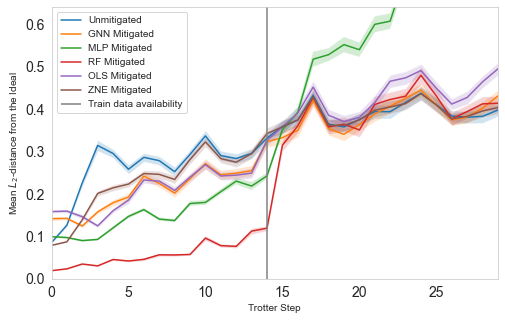

In [43]:
plt.style.use({'figure.facecolor':'white'})
plt.figure(figsize=(8, 5))
steps = sorted(set(df_coherent.step))
legend_labels = ['Unmitigated', 'GNN Mitigated', 'MLP Mitigated', 'RF Mitigated', 'OLS Mitigated', 'ZNE Mitigated']
for i, col in enumerate(['L2_noisy', 'L2_gnn', 'L2_mlp', 'L2_rfr_list', 'L2_ols_full', 'L2_zne']):
    plt.plot(steps, df_mean_coherent[col], label=legend_labels[i])
    plt.fill_between(x=steps, y1=df_mean_coherent[col]-df_ste_coherent[col], y2=df_mean_coherent[col]+df_ste_coherent[col], alpha=0.2)
plt.xlabel('Trotter Step')
plt.ylabel(r'Mean $L_2$-distance from the Ideal')
plt.ylim([0, 0.64])
plt.xlim([0, 29])
plt.vlines(x=14, ymin=0, ymax=1, color='gray', label='Train data availability')
plt.legend()
plt.grid(None)
plt.show()

# The big plot

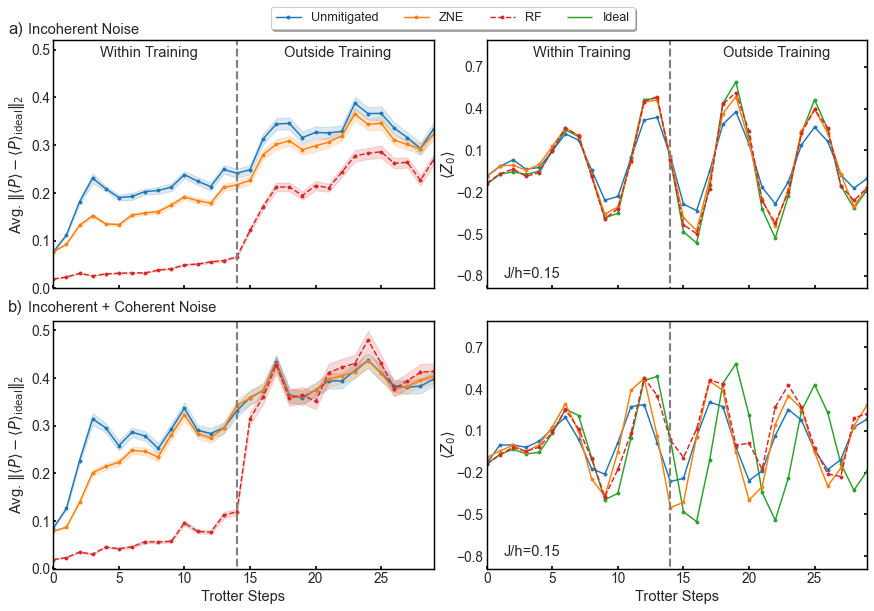

In [12]:
import matplotlib as mpl
ms, fs, lw, elw, cs = 9, 15, 2.5, 2, 0
marker = '.'
mpl.rc('xtick', labelsize=14)
mpl.rc('ytick', labelsize=14)
mpl.rc('font', weight='normal')

fig = plt.figure(figsize=(15, 10), dpi=70)
ax = [fig.add_subplot(2,2,i+1) for i in range(4)]
plt.style.use({'figure.facecolor':'white'})

###################################################
steps = sorted(set(df_incoherent.step))
legend_labels = ['Unmitigated', 'ZNE', 'RF']#['Unmitigated', 'GNN', 'MLP', 'RF', 'OLS', 'ZNE']
cols = ['L2_noisy', 'L2_zne', 'L2_rfr_list']#['L2_noisy', 'L2_gnn', 'L2_mlp', 'L2_rfr_list', 'L2_ols_full', 'L2_zne']
a = 0.1
alphas = [1]*3 #[1, a, a, 1, a, 1]
line_styles = ['solid', 'solid', 'dashed']

for i, col in enumerate(cols):
    ax[0].plot(steps, df_mean_incoherent[col], label=legend_labels[i], color=colors[legend_labels[i]], alpha=alphas[i], marker=marker, linestyle=line_styles[i])
    ax[0].fill_between(x=steps, y1=df_mean_incoherent[col]-df_ste_incoherent[col], y2=df_mean_incoherent[col]+df_ste_incoherent[col], alpha=alphas[i]/6, color=colors[legend_labels[i]])
ax[0].hlines(-100, 0, 1, label='Ideal', color=colors['Ideal'])

#################################################
q = 0
ax[1].plot(-exp_Z_all_ideal_incoherent[:, q], label='ideal', color=colors['Ideal'], marker=marker)
ax[1].plot(-exp_Z_all_noisy_incoherent[:, q], label='Unmitigated', color=colors['Unmitigated'], marker=marker)
for key, val in exp_Z_all_mitigated_dict_incoherent.items():
    if models_incoherent[key] in ['zne']:
        ax[1].plot(-val[:, q], label='ZNE', color=colors['ZNE'], marker=marker)
for key, val in exp_Z_all_mitigated_dict_incoherent.items():
    if models_incoherent[key] in ['rfr_list']:
        ax[1].plot(-val[:, q], label='RF', color=colors['RF'], marker=marker, linestyle='dashed')

###################################################
steps = sorted(set(df_incoherent.step))
for i, col in enumerate(cols):
    ax[2].plot(steps, df_mean_coherent[col], label=legend_labels[i], color=colors[legend_labels[i]], alpha=alphas[i], marker=marker, linestyle=line_styles[i])
    ax[2].fill_between(x=steps, y1=df_mean_coherent[col]-df_ste_coherent[col], y2=df_mean_coherent[col]+df_ste_coherent[col], alpha=alphas[i]/6, color=colors[legend_labels[i]])

#################################################
q = 0
ax[3].plot(-exp_Z_all_ideal_coherent[:, q], label='ideal', color=colors['Ideal'], marker=marker)
ax[3].plot(-exp_Z_all_noisy_coherent[:, q], label='Unmitigated', color=colors['Unmitigated'], marker=marker)
for key, val in exp_Z_all_mitigated_dict_coherent.items():
    if models_coherent[key] in ['zne']:
        ax[3].plot(-val[:, q], label='ZNE', color=colors['ZNE'], marker=marker)
for key, val in exp_Z_all_mitigated_dict_coherent.items():
    if models_coherent[key] in ['rfr_list']:
        ax[3].plot(-val[:, q], label='RF', color=colors['RF'], marker=marker, linestyle='dashed')


##############################################
for i in [2, 3]:
    ax[i].set_xlabel('Trotter Steps', fontsize=fs)

for i in [0, 2]:
    ax[i].yaxis.set_tick_params(
        which='both',      # both major and minor ticks are affected
        left=True,      # ticks along the bottom edge are off
        right=False,         # ticks along the top edge are off
        direction='in',
        width=2)
    ax[i].set_ylabel(r'Avg. $\Vert \langle P \rangle - \langle P \rangle_{\mathrm{ideal}} \Vert_2$', fontsize=fs)
    ax[i].set_xlim([0, 29])
    ax[i].set_ylim([0, 0.52])

for i in [1, 3]:
    ax[i].yaxis.set_tick_params(
        which='both',      # both major and minor ticks are affected
        left=False,      # ticks along the bottom edge are off
        right=True,         # ticks along the top edge are off
        direction='in',
        width=2)
    ax[i].set_xlim([0, 29])
    ax[i].set_ylim([-0.89, 0.89])
    ymin, ymax = ax[i].get_ylim()
    ax[i].set_yticks(np.arange(-0.8, 0.9, 0.3))
    ax[i].set_ylabel(r'$\langle Z_0 \rangle$', fontsize=fs, rotation=90, labelpad=-2)
    # ax[i].yaxis.tick_right()
    # ax[i].yaxis.set_label_position("right")

for i in [0, 1]:
    ax[i].set_xlabel(None)
    ax[i].set_xticklabels([])

ax[0].legend(loc='upper center', bbox_to_anchor=(1.05, 2.28/2+0.02),
          fancybox=True, shadow=True, ncol=4, fontsize=fs-2)

for a in ax:
    a.vlines(x=14, ymin=-100, ymax=100, color='gray', linestyles='dashed', linewidth=2.2)
    a.xaxis.set_tick_params(
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True, # labels along the bottom edge are off
    direction='in',
    width=2)
    a.grid(None)
    for axis in ['top','bottom','left','right']:
        a.spines[axis].set_linewidth(1.5)
        a.spines[axis].set_color('black')

xshift = 0
plt.text(-35+xshift, 2.95, 'Incoherent Noise', fontsize=fs)
plt.text(-35+xshift, 0.95, 'Incoherent + Coherent Noise', fontsize=fs)
plt.text(-29.5+xshift, 2.78, 'Within Training', fontsize=fs)
plt.text(-15.5+xshift, 2.78, 'Outside Training', fontsize=fs)
plt.text(3.5+xshift, 2.78, 'Within Training', fontsize=fs)
plt.text(18+xshift, 2.78, 'Outside Training', fontsize=fs)

plt.text(-36.5+xshift, 2.95, 'a)', fontsize=fs+2)#, weight='bold')
plt.text(-36.5+xshift, 0.95, 'b)', fontsize=fs+2)#, weight='bold')

plt.text(1.25+xshift, 1.2, 'J/h=0.15', fontsize=fs)
plt.text(1.25+xshift, -0.8, 'J/h=0.15', fontsize=fs)

plt.subplots_adjust(hspace=0.13, wspace=0.14)
plt.savefig("/Users/haoranliao/GitHub/blackwater/docs/paper_figures/fig4_ising.pdf", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

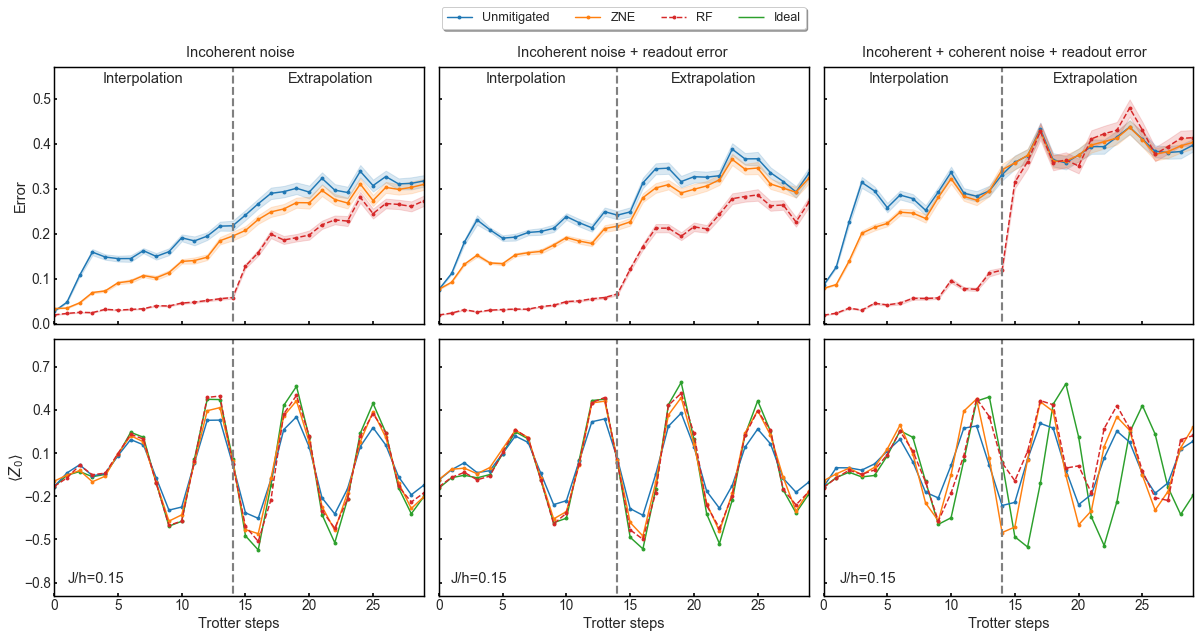

In [16]:
import matplotlib as mpl
ms, fs, lw, elw, cs = 9, 15, 2.5, 2, 0
marker = '.'
mpl.rc('xtick', labelsize=14)
mpl.rc('ytick', labelsize=14)
mpl.rc('font', weight='normal')

fig = plt.figure(figsize=(21, 10), dpi=70)
ax = [fig.add_subplot(2,3,i+1) for i in range(6)]
plt.style.use({'figure.facecolor':'white'})

###################################################
steps = sorted(set(df_no_readout.step))
legend_labels = ['Unmitigated', 'ZNE', 'RF']#['Unmitigated', 'GNN', 'MLP', 'RF', 'OLS', 'ZNE']
cols = ['L2_noisy', 'L2_zne', 'L2_rfr_list']#['L2_noisy', 'L2_gnn', 'L2_mlp', 'L2_rfr_list', 'L2_ols_full', 'L2_zne']
a = 0.1
alphas = [1]*3 #[1, a, a, 1, a, 1]
line_styles = ['solid', 'solid', 'dashed']

for i, col in enumerate(cols):
    ax[0].plot(steps, df_mean_no_readout[col], label=legend_labels[i], color=colors[legend_labels[i]], alpha=alphas[i], marker=marker, linestyle=line_styles[i])
    ax[0].fill_between(x=steps, y1=df_mean_no_readout[col]-df_ste_no_readout[col], y2=df_mean_no_readout[col]+df_ste_no_readout[col], alpha=alphas[i]/6, color=colors[legend_labels[i]])

###################################################
for i, col in enumerate(cols):
    ax[1].plot(steps, df_mean_incoherent[col], label=legend_labels[i], color=colors[legend_labels[i]], alpha=alphas[i], marker=marker, linestyle=line_styles[i])
    ax[1].fill_between(x=steps, y1=df_mean_incoherent[col]-df_ste_incoherent[col], y2=df_mean_incoherent[col]+df_ste_incoherent[col], alpha=alphas[i]/6, color=colors[legend_labels[i]])
ax[1].hlines(-100, 0, 1, label='Ideal', color=colors['Ideal'])

###################################################
steps = sorted(set(df_incoherent.step))
for i, col in enumerate(cols):
    ax[2].plot(steps, df_mean_coherent[col], label=legend_labels[i], color=colors[legend_labels[i]], alpha=alphas[i], marker=marker, linestyle=line_styles[i])
    ax[2].fill_between(x=steps, y1=df_mean_coherent[col]-df_ste_coherent[col], y2=df_mean_coherent[col]+df_ste_coherent[col], alpha=alphas[i]/6, color=colors[legend_labels[i]])

#################################################
q = 0
ax[3].plot(-exp_Z_all_ideal_no_readout[:, q], label='ideal', color=colors['Ideal'], marker=marker)
ax[3].plot(-exp_Z_all_noisy_no_readout[:, q], label='Unmitigated', color=colors['Unmitigated'], marker=marker)
for key, val in exp_Z_all_mitigated_dict_no_readout.items():
    if models_no_readout[key] in ['zne']:
        ax[3].plot(-val[:, q], label='ZNE', color=colors['ZNE'], marker=marker)
for key, val in exp_Z_all_mitigated_dict_no_readout.items():
    if models_no_readout[key] in ['rfr_list']:
        ax[3].plot(-val[:, q], label='RF', color=colors['RF'], marker=marker, linestyle='dashed')

#################################################
q = 0
ax[4].plot(-exp_Z_all_ideal_incoherent[:, q], label='ideal', color=colors['Ideal'], marker=marker)
ax[4].plot(-exp_Z_all_noisy_incoherent[:, q], label='Unmitigated', color=colors['Unmitigated'], marker=marker)
for key, val in exp_Z_all_mitigated_dict_incoherent.items():
    if models_incoherent[key] in ['zne']:
        ax[4].plot(-val[:, q], label='ZNE', color=colors['ZNE'], marker=marker)
for key, val in exp_Z_all_mitigated_dict_incoherent.items():
    if models_incoherent[key] in ['rfr_list']:
        ax[4].plot(-val[:, q], label='RF', color=colors['RF'], marker=marker, linestyle='dashed')

#################################################
q = 0
ax[5].plot(-exp_Z_all_ideal_coherent[:, q], label='ideal', color=colors['Ideal'], marker=marker)
ax[5].plot(-exp_Z_all_noisy_coherent[:, q], label='Unmitigated', color=colors['Unmitigated'], marker=marker)
for key, val in exp_Z_all_mitigated_dict_coherent.items():
    if models_coherent[key] in ['zne']:
        ax[5].plot(-val[:, q], label='ZNE', color=colors['ZNE'], marker=marker)
for key, val in exp_Z_all_mitigated_dict_coherent.items():
    if models_coherent[key] in ['rfr_list']:
        ax[5].plot(-val[:, q], label='RF', color=colors['RF'], marker=marker, linestyle='dashed')

##############################################
for i in [3, 4, 5]:
    ax[i].set_xlabel('Trotter steps', fontsize=fs)

# ax[0].set_ylabel(r'Avg. $\Vert \langle P \rangle - \langle P \rangle_{\mathrm{ideal}} \Vert_2$', fontsize=fs)
ax[0].set_ylabel('Error', fontsize=fs)

for i in [0, 1, 2]:
    ax[i].yaxis.set_tick_params(
        which='both',      # both major and minor ticks are affected
        left=True,      # ticks along the bottom edge are off
        right=False,         # ticks along the top edge are off
        direction='in',
        width=2)
    ax[i].set_xlim([0, 29])
    ax[i].set_ylim([0, 0.57])

ax[3].set_ylabel(r'$\langle Z_0 \rangle$', fontsize=fs, rotation=90, labelpad=-2)

for i in [3, 4, 5]:
    ax[i].yaxis.set_tick_params(
        which='both',      # both major and minor ticks are affected
        left=True,      # ticks along the bottom edge are off
        right=False,         # ticks along the top edge are off
        direction='in',
        width=2)
    ax[i].set_xlim([0, 29])
    ax[i].set_ylim([-0.89, 0.89])
    ymin, ymax = ax[i].get_ylim()
    ax[i].set_yticks(np.arange(-0.8, 0.9, 0.3))
    # ax[i].yaxis.tick_right()
    # ax[i].yaxis.set_label_position("right")

for i in [0, 1, 2]:
    ax[i].set_xlabel(None)
    ax[i].set_xticklabels([])

for i in [1, 2, 4, 5]:
    ax[i].set_ylabel(None)
    ax[i].set_yticklabels([])

ax[1].legend(loc='upper center', bbox_to_anchor=(0.5, 2.28/2+0.12),
          fancybox=True, shadow=True, ncol=4, fontsize=fs-2)

for a in ax:
    a.vlines(x=14, ymin=-100, ymax=100, color='gray', linestyles='dashed', linewidth=2.2)
    a.xaxis.set_tick_params(
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True, # labels along the bottom edge are off
    direction='in',
    width=2)
    a.grid(None)
    for axis in ['top','bottom','left','right']:
        a.spines[axis].set_linewidth(1.5)
        a.spines[axis].set_color('black')

xshift = 0
plt.text(-50+xshift, 2.85, 'Incoherent noise', fontsize=fs)
plt.text(-24+xshift, 2.85, 'Incoherent noise + readout error', fontsize=fs)
plt.text(3+xshift, 2.85, 'Incoherent + coherent noise + readout error', fontsize=fs)
plt.text(-56.5+xshift, 2.67, 'Interpolation', fontsize=fs)
plt.text(-42+xshift, 2.67, 'Extrapolation', fontsize=fs)
plt.text(-26.5+xshift, 2.67, 'Interpolation', fontsize=fs)
plt.text(-12+xshift, 2.67, 'Extrapolation', fontsize=fs)
plt.text(3.5+xshift, 2.67, 'Interpolation', fontsize=fs)
plt.text(18+xshift, 2.67, 'Extrapolation', fontsize=fs)

# plt.text(-36.5+xshift, 2.95, 'a)', fontsize=fs+2)#, weight='bold')
# plt.text(-36.5+xshift, 0.95, 'b)', fontsize=fs+2)#, weight='bold')

plt.text(-59.25+xshift, -0.8, 'J/h=0.15', fontsize=fs)
plt.text(-29.25+xshift, -0.8, 'J/h=0.15', fontsize=fs)
plt.text(1.25+xshift, -0.8, 'J/h=0.15', fontsize=fs)

plt.subplots_adjust(hspace=0.06, wspace=0.04)
plt.savefig("/Users/haoranliao/GitHub/blackwater/docs/paper_figures/fig4_ising.pdf", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

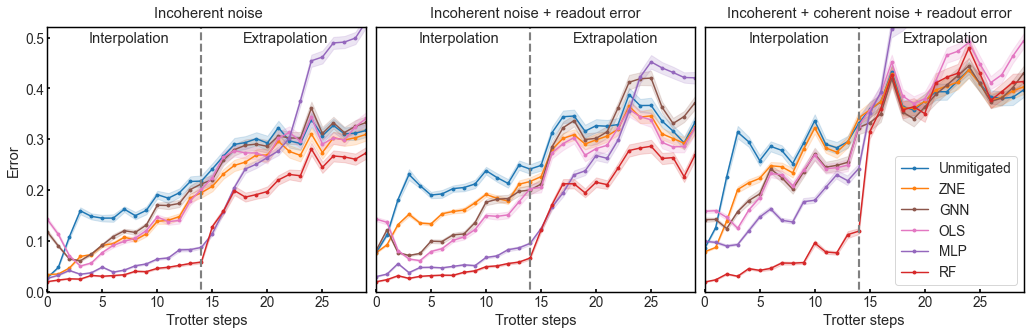

In [83]:
import matplotlib as mpl
ms, fs, lw, elw, cs = 9, 15, 2.5, 2, 0
marker = '.'
mpl.rc('xtick', labelsize=14)
mpl.rc('ytick', labelsize=14)
mpl.rc('font', weight='normal')

fig = plt.figure(figsize=(18, 5), dpi=70)
ax = [fig.add_subplot(1,3,i+1) for i in range(3)]
plt.style.use({'figure.facecolor':'white'})

###################################################
steps = sorted(set(df_incoherent.step))
legend_labels = ['Unmitigated', 'ZNE', 'GNN', 'OLS', 'MLP', 'RF']
cols = ['L2_noisy', 'L2_zne', 'L2_gnn', 'L2_ols_full', 'L2_mlp', 'L2_rfr_list']
a = 1
alphas = [1, a, a, 1, a, 1]

#################################################
for i, col in enumerate(cols):
    ax[0].plot(steps, df_mean_no_readout[col], label=legend_labels[i], color=colors[legend_labels[i]], alpha=alphas[i], marker=marker)
    ax[0].fill_between(x=steps, y1=df_mean_no_readout[col]-df_ste_no_readout[col], y2=df_mean_no_readout[col]+df_ste_no_readout[col], alpha=alphas[i]/6, color=colors[legend_labels[i]])

##################################################
for i, col in enumerate(cols):
    ax[1].plot(steps, df_mean_incoherent[col], label=legend_labels[i], color=colors[legend_labels[i]], alpha=alphas[i], marker=marker)
    ax[1].fill_between(x=steps, y1=df_mean_incoherent[col]-df_ste_incoherent[col], y2=df_mean_incoherent[col]+df_ste_incoherent[col], alpha=alphas[i]/6, color=colors[legend_labels[i]])


###################################################
# ax[2].hlines(-100, 0, 1, label='Ideal', color=colors['Ideal'])
for i, col in enumerate(cols):
    ax[2].plot(steps, df_mean_coherent[col], label=legend_labels[i], color=colors[legend_labels[i]], alpha=alphas[i], marker=marker)
    ax[2].fill_between(x=steps, y1=df_mean_coherent[col]-df_ste_coherent[col], y2=df_mean_coherent[col]+df_ste_coherent[col], alpha=alphas[i]/6, color=colors[legend_labels[i]])

##############################################
for i in [0, 1, 2]:
    ax[i].set_xlabel('Trotter steps', fontsize=fs)
    ax[i].set_xlim([0, 29])
    ax[i].set_ylim([0, 0.52])

for i in [0]:
    ax[i].yaxis.set_tick_params(
        which='both',      # both major and minor ticks are affected
        left=True,      # ticks along the bottom edge are off
        right=False,         # ticks along the top edge are off
        direction='in',
        width=2)
    # ax[i].set_ylabel(r'Avg. $\Vert \langle P \rangle - \langle P \rangle_{\mathrm{ideal}} \Vert_2$', fontsize=fs)
    ax[i].set_ylabel('Error', fontsize=fs)


for i in [1, 2]:
    ax[i].set_ylabel(None)
    ax[i].set_yticklabels([])

ax[2].legend(fontsize=fs-1, loc='lower right')

for a in ax:
    a.vlines(x=14, ymin=-100, ymax=100, color='gray', linestyles='dashed', linewidth=2.2)
    a.xaxis.set_tick_params(
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True, # labels along the bottom edge are off
    direction='in',
    width=2)
    a.grid(None)
    for axis in ['top','bottom','left','right']:
        a.spines[axis].set_linewidth(1.5)
        a.spines[axis].set_color('black')

# xshift = 0
plt.text(-50+xshift, 0.54, 'Incoherent noise', fontsize=fs)
plt.text(-25+xshift, 0.54, 'Incoherent noise + readout error', fontsize=fs)
plt.text(2+xshift, 0.54, 'Incoherent + coherent noise + readout error', fontsize=fs)
plt.text(4+xshift, 0.49, 'Interpolation', fontsize=fs)
plt.text(18+xshift, 0.49, 'Extrapolation', fontsize=fs)
plt.text(-26+xshift, 0.49, 'Interpolation', fontsize=fs)
plt.text(-12+xshift, 0.49, 'Extrapolation', fontsize=fs)
plt.text(-56+xshift, 0.49, 'Interpolation', fontsize=fs)
plt.text(-42+xshift, 0.49, 'Extrapolation', fontsize=fs)
#
# plt.text(-3.5, 1.13, 'a)', fontsize=fs+2)#, weight='bold')
# plt.text(-3.5, 0.54, 'b)', fontsize=fs+2)#, weight='bold')

plt.subplots_adjust(wspace=0.03)
plt.savefig("/Users/haoranliao/GitHub/blackwater/docs/paper_figures/fig4_ising_appendix.pdf", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

# Ising, Hardware

In [7]:
with open('/Users/haoranliao/GitHub/blackwater/docs/paper_figures/hardware_over_depth.pk', 'rb') as file:
    loaded = pickle.load(file)
df_mean_incoherent = loaded['df_mean']
df_ste_incoherent = loaded['df_ste']
df_incoherent = loaded['df']

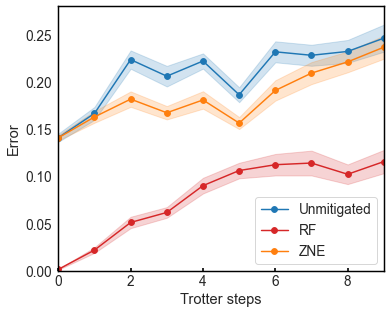

In [27]:
import matplotlib as mpl
ms, fs, lw, elw, cs = 9, 15, 2.5, 2, 0
marker = '.'
mpl.rc('xtick', labelsize=14)
mpl.rc('ytick', labelsize=14)
mpl.rc('font', weight='normal')

fig = plt.figure(figsize=(6, 5), dpi=70)
ax = [fig.add_subplot(1,1,i+1) for i in range(1)]
plt.style.use({'figure.facecolor':'white'})

steps = sorted(set(df_incoherent.step))
legend_labels = ['Unmitigated', 'RF', 'ZNE']
for i, col in enumerate(['L2_noisy', 'L2_rfr_list', 'L2_zne']):
    ax[0].plot(steps, df_mean_incoherent[col], label=legend_labels[i], marker='o', color=colors[legend_labels[i]])
    ax[0].fill_between(x=steps, y1=df_mean_incoherent[col]-df_ste_incoherent[col], y2=df_mean_incoherent[col]+df_ste_incoherent[col], alpha=0.2, color=colors[legend_labels[i]])

for a in ax:
    a.vlines(x=14, ymin=-100, ymax=100, color='gray', linestyles='dashed', linewidth=2.2)
    a.xaxis.set_tick_params(
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True, # labels along the bottom edge are off
    direction='in',
    width=2)
    a.grid(None)
    for axis in ['top','bottom','left','right']:
        a.spines[axis].set_linewidth(1.5)
        a.spines[axis].set_color('black')

ax[0].legend(fontsize=fs-1, loc='lower right')

ax[0].set_xlabel('Trotter steps', fontsize=fs)
ax[0].set_ylabel(r'Error', fontsize=fs)
ax[0].set_ylim([0, 0.28])
ax[0].set_xlim([0, 9])

plt.savefig("/Users/haoranliao/GitHub/blackwater/docs/paper_figures/fig_small_exp.pdf", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

# Tomography

In [119]:
with open('/Users/haoranliao/GitHub/blackwater/docs/paper_figures/tomograhy.pk', 'rb') as file:
    loaded = pickle.load(file)
df2 = loaded['df2']

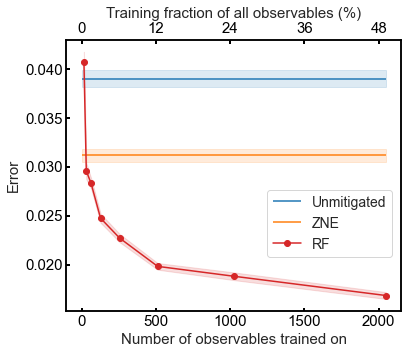

In [152]:
import matplotlib as mpl
ms, fs, lw, elw, cs = 9, 15, 2.5, 2, 0
mpl.rc('xtick', labelsize=15, color='black')
mpl.rc('ytick', labelsize=15, color='black')
mpl.rc('font', weight='normal')

fig = plt.figure(figsize=(6, 5))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

x = df2.index
xx = np.linspace(0, x[-1])

y = df2['dist_l2_noisy_0']['mean'].iloc[5]
ax1.hlines(y, xx[0], xx[-1], label='Unmitigated', color=colors['Unmitigated'])
ax1.fill_between(xx,
                 np.repeat(y-df2['dist_l2_noisy_0']['std'].iloc[5]/np.sqrt(4**6 - x[5]), len(xx)),
                 np.repeat(y+df2['dist_l2_noisy_0']['std'].iloc[5]/np.sqrt(4**6 - x[5]), len(xx)),
                 alpha=0.15, color=colors['Unmitigated'])

y = df2['dist_l2_zne_mitigated_0']['mean'].iloc[5]
ax1.hlines(y, xx[0], xx[-1], label='ZNE', color=colors['ZNE'])
ax1.fill_between(xx,
                 np.repeat(y-df2['dist_l2_zne_mitigated_0']['std'].iloc[5]/np.sqrt(4**6 - x[5]), len(xx)), np.repeat(y+df2['dist_l2_zne_mitigated_0']['std'].iloc[5]/np.sqrt(4**6 - x[5]), len(xx)),
                 alpha=0.15, color=colors['ZNE'])

y = df2['dist_l2_mitigated_0']['mean']
ax1.plot(x, y, label='RF', marker='o', color=colors['RF'])
ax1.fill_between(x,
                 y-df2['dist_l2_mitigated_0']['std']/np.sqrt(4**6 - x),
                 y+df2['dist_l2_mitigated_0']['std']/np.sqrt(4**6 - x),
                 alpha=0.15, color=colors['RF'])

# ax1.set_yscale('log')
# plt.xscale('log')

ax2.set_xlim(ax1.get_xlim())
ax2.set_navigate(False)
import matplotlib.ticker as mticks
ticks = ax1.get_xticks()
ax2.xaxis.set_major_locator(mticks.FixedLocator(ticks))
percent = [int(x) for x in np.array(ticks)/4**6 * 100]
ax2.set_xticklabels([str(x) for x in percent])
ax2.set_xlabel(r"Training fraction of all observables (%)", fontsize=fs)

#$\|\langle O\rangle-\langle O\rangle _{\mathregular{ideal}} \|_2$
# ax1.set_ylabel(r'Avg. $\Vert \langle \hat{O} \rangle - \langle \hat{O} \rangle_{\mathrm{ideal}} \Vert_2$', fontsize=fs)
ax1.set_ylabel('Error', fontsize=fs)
ax1.set_xlabel('Number of observables trained on', fontsize=fs)
ax1.legend(fontsize=fs-1, loc=(0.6, 0.2))

ax1.xaxis.set_tick_params(
which='both',      # both major and minor ticks are affected
bottom=True,      # ticks along the bottom edge are off
top=True,         # ticks along the top edge are off
labelbottom=True, # labels along the bottom edge are off
direction='in',
width=2)
ax2.xaxis.set_tick_params(
which='both',      # both major and minor ticks are affected
bottom=True,      # ticks along the bottom edge are off
top=True,         # ticks along the top edge are off
labelbottom=False, # labels along the bottom edge are off
direction='in',
width=2)
ax1.yaxis.set_tick_params(
which='both',      # both major and minor ticks are affected
left=True,      # ticks along the bottom edge are off
right=False,         # ticks along the top edge are off
direction='in',
width=2)
ax1.grid(None)
ax2.grid(None)
for axis in ['top','bottom','left','right']:
    ax1.spines[axis].set_linewidth(1.5)
    ax1.spines[axis].set_color('black')
    ax2.spines[axis].set_linewidth(1.5)
    ax2.spines[axis].set_color('black')

plt.style.use({'figure.facecolor':'white'})
plt.savefig("/Users/haoranliao/GitHub/blackwater/docs/paper_figures/subfig5_tomography.pdf", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

# Mimic ZNE

In [4]:
with open('/Users/haoranliao/GitHub/blackwater/docs/paper_figures/mimic_zne.pk', 'rb') as file:
    loaded = pickle.load(file)
df_pred = loaded['df_pred']

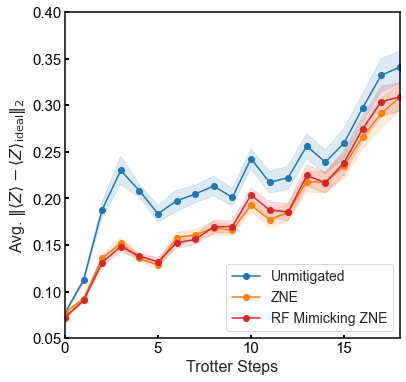

In [144]:
import matplotlib as mpl
ms, fs, lw, elw, cs = 9, 16, 2.5, 2, 0
mpl.rc('xtick', labelsize=15)
mpl.rc('ytick', labelsize=15)
mpl.rc('font', weight='normal')

df_pred_mean = df_pred.groupby('steps').agg('mean', numeric_only=True)
df_pred_ste = df_pred.groupby('steps').agg('std', numeric_only=True) / np.sqrt(len(df_pred[df_pred['steps']==0]))

plt.style.use({'figure.facecolor':'white'})
plt.figure(figsize=(6, 6))
a = plt.gca()

steps = sorted(set(df_pred.steps))
legend_labels = ['Unmitigated', 'ZNE', 'RF Mimicking ZNE']
colors_ = [colors['Unmitigated'], colors['ZNE'], colors['RF']]
for i, col in enumerate(['L2_noisy', 'L2_zne_mitigated', 'L2_tree_pred']):
    plt.plot(steps, df_pred_mean[col], label=legend_labels[i], color=colors_[i], marker='o')
    plt.fill_between(x=steps, y1=df_pred_mean[col]-df_pred_ste[col], y2=df_pred_mean[col]+df_pred_ste[col], alpha=0.15, color=colors_[i])
plt.xlabel('Trotter Steps', fontsize=fs)
plt.ylabel(r'Avg. $\Vert \langle Z \rangle - \langle Z \rangle_{\mathrm{ideal}} \Vert_2$', fontsize=fs)
plt.xlim([0, 18])
plt.ylim([0.05, 0.4])
plt.legend(fontsize=fs-2, loc='lower right')

a.xaxis.set_tick_params(
which='both',      # both major and minor ticks are affected
bottom=True,      # ticks along the bottom edge are off
top=False,         # ticks along the top edge are off
labelbottom=True, # labels along the bottom edge are off
direction='in',
width=2)
a.yaxis.set_tick_params(
which='both',      # both major and minor ticks are affected
left=True,      # ticks along the bottom edge are off
right=False,         # ticks along the top edge are off
direction='in',
width=2)
a.grid(None)
for axis in ['top','bottom','left','right']:
    a.spines[axis].set_linewidth(1.5)
    a.spines[axis].set_color('black')

plt.savefig("/Users/haoranliao/GitHub/blackwater/docs/paper_figures/subfig5_mimicry.pdf", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

In [58]:
df = pd.read_pickle('/Users/haoranliao/GitHub/blackwater/docs/paper_figures/mimic_zne_hardware.pk')
new_df = df

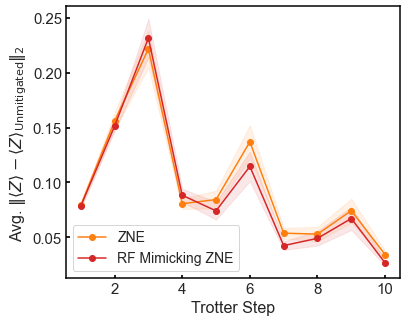

In [42]:
import warnings
warnings.filterwarnings('ignore')

def l2_dist(list1, list2):
    return np.sqrt(np.sum([(a - b)**2 for a, b in zip(list1, list2)]))

import matplotlib as mpl
ms, fs, lw, elw, cs = 9, 16, 2.5, 2, 0
mpl.rc('xtick', labelsize=15)
mpl.rc('ytick', labelsize=15)
mpl.rc('font', weight='normal')

for col in new_df.columns:
    if col not in ['step', 'noisy', 'J']:
        new_df[f'L2_{col}'] = new_df.apply(lambda row: l2_dist(row['noisy'], row[col]), axis=1)

df_mimic_mean = new_df.groupby('step').agg('mean')
df_mimic_ste = new_df.groupby('step').agg('std') / np.sqrt(25*5)

plt.style.use({'figure.facecolor':'white'})
plt.figure(figsize=(6, 5))
a = plt.gca()
steps = sorted(set(new_df.step))
legend_labels = ['ZNE', 'RF Mimicking ZNE']#, 'Ideal', 'Unmitigated']
colors_ = [colors['ZNE'], colors['RF']]#, colors['Ideal'], colors['Unmitigated']]
for i, col in enumerate(['L2_zne_mitigated', 'L2_rfr_list']):
    plt.plot(steps, df_mimic_mean[col], label=legend_labels[i], color=colors_[i], marker='o')
    plt.fill_between(x=steps, y1=df_mimic_mean[col]-df_mimic_ste[col], y2=df_mimic_mean[col]+df_mimic_ste[col], alpha=0.1, color=colors_[i])
plt.xlabel('Trotter Step', fontsize=fs)
plt.ylabel(r'Avg. $\Vert \langle Z \rangle - \langle Z \rangle_{\mathrm{Unmitigated}} \Vert_2$', fontsize=fs)
plt.legend(fontsize=fs-2, loc='lower left')

a.xaxis.set_tick_params(
which='both',      # both major and minor ticks are affected
bottom=True,      # ticks along the bottom edge are off
top=False,         # ticks along the top edge are off
labelbottom=True, # labels along the bottom edge are off
direction='in',
width=2)
a.yaxis.set_tick_params(
which='both',      # both major and minor ticks are affected
left=True,      # ticks along the bottom edge are off
right=False,         # ticks along the top edge are off
direction='in',
width=2)
a.grid(None)
for axis in ['top','bottom','left','right']:
    a.spines[axis].set_linewidth(1.5)
    a.spines[axis].set_color('black')

plt.show()

In [ ]:
df = pd.read_pickle('/Users/haoranliao/GitHub/blackwater/docs/paper_figures/mimic_zne_hardware.pk')
new_df = df

In [59]:
import warnings
warnings.filterwarnings('ignore')

def l2_dist(list1, list2):
    return np.sqrt(np.sum([(a - b)**2 for a, b in zip(list1, list2)]))

import matplotlib as mpl
ms, fs, lw, elw, cs = 9, 16, 2.5, 2, 0
mpl.rc('xtick', labelsize=15)
mpl.rc('ytick', labelsize=15)
mpl.rc('font', weight='normal')

for col in new_df.columns:
    if col not in ['step', 'noisy', 'J', 'zne_mitigated']:
        new_df[f'L2_{col}'] = new_df.apply(lambda row: l2_dist(row['zne_mitigated'], row[col]), axis=1)

df_mimic_zne_mean = new_df.groupby('step').agg('mean')
df_mimic_zne_ste = new_df.groupby('step').agg('std') / np.sqrt(25*5)

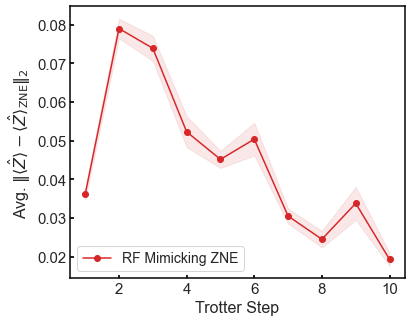

In [60]:
plt.style.use({'figure.facecolor':'white'})
plt.figure(figsize=(6, 5))
a = plt.gca()
steps = sorted(set(new_df.step))
legend_labels = ['RF Mimicking ZNE']#, 'Ideal', 'Unmitigated']
colors_ = [colors['RF']]#, colors['Ideal'], colors['Unmitigated']]
for i, col in enumerate(['L2_rfr_list']):
    plt.plot(steps, df_mimic_zne_mean[col], label=legend_labels[i], color=colors_[i], marker='o')
    plt.fill_between(x=steps, y1=df_mimic_zne_mean[col]-df_mimic_zne_ste[col], y2=df_mimic_zne_mean[col]+df_mimic_zne_ste[col], alpha=0.1, color=colors_[i])
plt.xlabel('Trotter Step', fontsize=fs)
plt.ylabel(r'Avg. $\Vert \langle \hat{Z} \rangle - \langle \hat{Z} \rangle_{\mathrm{ZNE}} \Vert_2$', fontsize=fs)
plt.legend(fontsize=fs-2, loc='lower left')

a.xaxis.set_tick_params(
which='both',      # both major and minor ticks are affected
bottom=True,      # ticks along the bottom edge are off
top=False,         # ticks along the top edge are off
labelbottom=True, # labels along the bottom edge are off
direction='in',
width=2)
a.yaxis.set_tick_params(
which='both',      # both major and minor ticks are affected
left=True,      # ticks along the bottom edge are off
right=False,         # ticks along the top edge are off
direction='in',
width=2)
a.grid(None)
for axis in ['top','bottom','left','right']:
    a.spines[axis].set_linewidth(1.5)
    a.spines[axis].set_color('black')

plt.show()

In [107]:
df_to_plot = pd.read_pickle('/Users/haoranliao/GitHub/blackwater/docs/paper_figures/mimic_zne_hardware_over_steps.pk')
df_to_plot = df_to_plot.sort_values(by='J')
df_to_plot

,mean,ste,QEM,step,J/h,J
44,-0.404626,0.007538,RF Mimicking ZNE,5,J/h=0.07,0.134881
31,-0.477380,0.001118,ZNE,1,J/h=0.07,0.134881
32,-0.476822,0.000769,RF Mimicking ZNE,1,J/h=0.07,0.134881
33,-0.424592,0.004986,Unmitigated,2,J/h=0.07,0.134881
34,-0.561980,0.004368,ZNE,2,J/h=0.07,0.134881
...,...,...,...,...,...,...
26,-0.019144,0.001454,RF Mimicking ZNE,9,J/h=0.79,1.628024
27,-0.004176,0.001266,Unmitigated,10,J/h=0.79,1.628024
28,0.002624,0.001398,ZNE,10,J/h=0.79,1.628024
15,0.018928,0.003013,Unmitigated,6,J/h=0.79,1.628024


In [108]:
df_to_plot = df_to_plot.replace('RF Mimicking ZNE', 'RF-ZNE')
df_to_plot

,mean,ste,QEM,step,J/h,J
44,-0.404626,0.007538,RF-ZNE,5,J/h=0.07,0.134881
31,-0.477380,0.001118,ZNE,1,J/h=0.07,0.134881
32,-0.476822,0.000769,RF-ZNE,1,J/h=0.07,0.134881
33,-0.424592,0.004986,Unmitigated,2,J/h=0.07,0.134881
34,-0.561980,0.004368,ZNE,2,J/h=0.07,0.134881
...,...,...,...,...,...,...
26,-0.019144,0.001454,RF-ZNE,9,J/h=0.79,1.628024
27,-0.004176,0.001266,Unmitigated,10,J/h=0.79,1.628024
28,0.002624,0.001398,ZNE,10,J/h=0.79,1.628024
15,0.018928,0.003013,Unmitigated,6,J/h=0.79,1.628024


In [109]:
df_to_plot_plus = df_to_plot.copy()
df_to_plot_minus = df_to_plot.copy()
df_to_plot_plus['Mean+-Error'] = df_to_plot['mean']+df_to_plot['ste']
df_to_plot_minus['Mean+-Error'] = df_to_plot['mean']-df_to_plot['ste']
df_to_plot_range = pd.concat([df_to_plot_plus, df_to_plot_minus],ignore_index=True)

In [110]:
import warnings
warnings.filterwarnings('ignore')

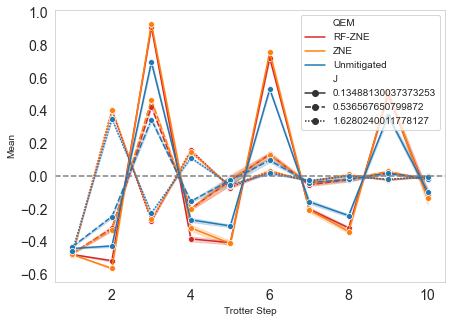

In [112]:
plt.style.use({'figure.facecolor':'white'})
plt.figure(figsize=(7, 5))
steps = sorted(set(df_to_plot.step))
legend_labels = ['ZNE', 'RF-ZNE']

#[df_to_plot_range.J!='J/h=0.26']
sns.lineplot(data=df_to_plot_range, x='step', y='Mean+-Error', errorbar='sd', style='J', hue='QEM', markers='o', palette=colors)
plt.xlabel('Trotter Step')
plt.ylabel(r'Mean')
xmin, xmax = plt.gca().get_xlim()
plt.xlim([xmin, xmax])
plt.hlines(y=0, xmin=xmin, xmax=xmax, color='gray', linestyles='dashed')
plt.legend()
ax = plt.gca()
# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles=handles[1:3]+handles[4:], labels=labels[1:3]+labels[4:])
plt.grid(None)
plt.show()

In [120]:
df_to_plot_range_J1 = df_to_plot_range[df_to_plot_range['J/h']=='J/h=0.07']
df_to_plot_range_J2 = df_to_plot_range[df_to_plot_range['J/h']=='J/h=0.26']

In [248]:
df_to_plot_range_J2

,mean,ste,QEM,step,J/h,J,Mean+-Error
30,-0.469092,0.003331,ZNE,1,J/h=0.26,0.536568,-0.465761
31,-0.014184,0.003753,Unmitigated,10,J/h=0.26,0.536568,-0.010431
32,0.022274,0.004149,RF-ZNE,9,J/h=0.26,0.536568,0.026423
33,0.030352,0.004826,ZNE,9,J/h=0.26,0.536568,0.035178
34,0.019304,0.004178,Unmitigated,9,J/h=0.26,0.536568,0.023482
35,-0.019351,0.008819,RF-ZNE,8,J/h=0.26,0.536568,-0.010532
36,-0.017232,0.008002,ZNE,8,J/h=0.26,0.536568,-0.009230
37,-0.017880,0.006761,Unmitigated,8,J/h=0.26,0.536568,-0.011119
38,-0.051589,0.005720,RF-ZNE,7,J/h=0.26,0.536568,-0.045869
39,-0.043176,0.007679,ZNE,7,J/h=0.26,0.536568,-0.035497


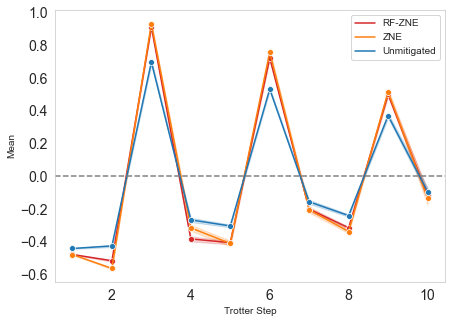

In [127]:
plt.style.use({'figure.facecolor':'white'})
plt.figure(figsize=(7, 5))
steps = sorted(set(df_to_plot.step))
legend_labels = ['ZNE', 'RF-ZNE']

sns.lineplot(data=df_to_plot_range_J1, x='step', y='Mean+-Error', errorbar='sd', hue='QEM', marker='o', palette=colors)
plt.xlabel('Trotter Step')
plt.ylabel(r'Mean')
xmin, xmax = plt.gca().get_xlim()
plt.xlim([xmin, xmax])
plt.hlines(y=0, xmin=xmin, xmax=xmax, color='gray', linestyles='dashed')
plt.legend()
ax = plt.gca()
# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles=handles[1:3]+handles[4:], labels=labels[1:3]+labels[4:])
plt.grid(None)
plt.show()

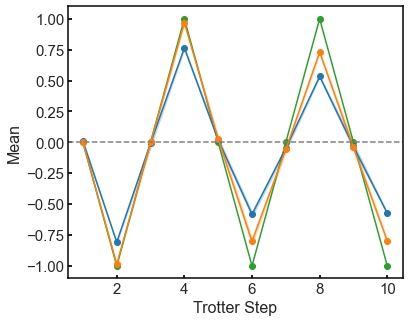

In [92]:
df = pd.read_pickle('/Users/haoranliao/GitHub/blackwater/docs/paper_figures/mimic_zne_hardware_cliff.pk')

k = 0
num_circ_per_step = 50
df_cliff = df.iloc[k::num_circ_per_step]

import warnings
warnings.filterwarnings('ignore')

import matplotlib as mpl
ms, fs, lw, elw, cs = 9, 16, 2.5, 2, 0
mpl.rc('xtick', labelsize=15)
mpl.rc('ytick', labelsize=15)
mpl.rc('font', weight='normal')

for col in df_cliff.columns:
    if col not in ['step']:
        df_cliff[f'mean_{col}'] = df_cliff[col].apply(np.mean)
        df_cliff[f'ste_{col}'] = df_cliff[col].apply(np.std) / np.sqrt(5)

plt.style.use({'figure.facecolor':'white'})
plt.figure(figsize=(6, 5))
steps = sorted(set(df_cliff.step))
legend_labels = ['Unmitigated', 'ZNE']

plt.plot(steps, [0, -1, 0, 1, 0, -1, 0, 1, 0, -1], label='Ideal', marker='o', color=colors['Ideal'])

colors_ = [colors['Unmitigated'], colors['ZNE']]
for i, col in enumerate(['mean_noisy', 'mean_zne_mitigated']):
    plt.plot(steps, df_cliff[col], label=legend_labels[i], marker='o', color=colors_[i])
    plt.fill_between(x=steps, y1=df_cliff[col]-df_cliff['ste_'+'_'.join(col.split('_')[1:])], y2=df_cliff[col]+df_cliff['ste_'+'_'.join(col.split('_')[1:])], alpha=0.2, color=colors_[i])
# plt.title(f'{k}-th sample with J={Js[k]}')
# plt.title(r'Trotterized 1D TFIM circuit with h=0.5$\pi$, J=0 (Clifford)', fontsize=fs-1)
plt.xlabel('Trotter Step', fontsize=fs)
plt.ylabel(r'Mean', fontsize=fs)
xmin, xmax = plt.gca().get_xlim()
plt.xlim([xmin, xmax])
plt.hlines(y=0, xmin=xmin, xmax=xmax, color='gray', linestyles='dashed')
# plt.legend(loc='center left', fontsize=fs-3)

a = plt.gca()
a.xaxis.set_tick_params(
which='both',      # both major and minor ticks are affected
bottom=True,      # ticks along the bottom edge are off
top=False,         # ticks along the top edge are off
labelbottom=True, # labels along the bottom edge are off
direction='in',
width=2)
a.yaxis.set_tick_params(
which='both',      # both major and minor ticks are affected
left=True,      # ticks along the bottom edge are off
right=False,         # ticks along the top edge are off
direction='in',
width=2)
a.grid(None)
for axis in ['top','bottom','left','right']:
    a.spines[axis].set_linewidth(1.5)
    a.spines[axis].set_color('black')

plt.show()

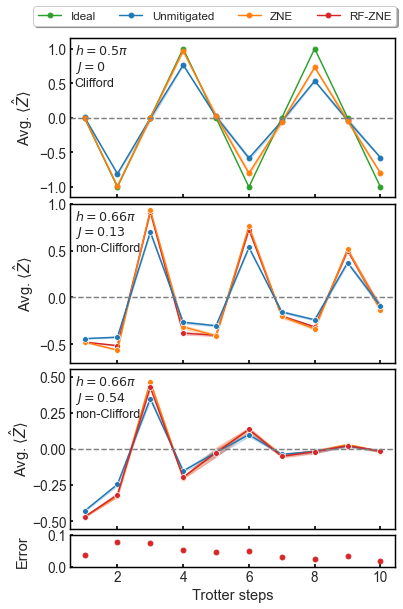

In [253]:
import matplotlib as mpl
import matplotlib.gridspec as gridspec
ms, fs, lw, elw, cs = 9, 15, 2.5, 2, 0
marker = '.'
mpl.rc('xtick', labelsize=14)
mpl.rc('ytick', labelsize=14)
mpl.rc('font', weight='normal')

fig = plt.figure(figsize=(6, 10), dpi=70)
gs = gridspec.GridSpec(4, 1, height_ratios=[1, 1, 1, 0.2])
ax = [plt.subplot(gs[i]) for i in range(4)]
# ax = [fig.add_subplot(3,1,i+1) for i in range(3)]
plt.style.use({'figure.facecolor':'white'})

###################################################
legend_labels = ['Unmitigated', 'ZNE']
ax[0].plot(steps, [0, -1, 0, 1, 0, -1, 0, 1, 0, -1], label='Ideal', marker='o', color=colors['Ideal'], markersize=5)
colors_ = [colors['Unmitigated'], colors['ZNE']]
for i, col in enumerate(['mean_noisy', 'mean_zne_mitigated']):
    ax[0].plot(steps, df_cliff[col], label=legend_labels[i], marker='o', color=colors_[i], markersize=5)
    ax[0].fill_between(x=steps, y1=df_cliff[col]-df_cliff['ste_'+'_'.join(col.split('_')[1:])], y2=df_cliff[col]+df_cliff['ste_'+'_'.join(col.split('_')[1:])], alpha=0.2, color=colors_[i])
ax[0].plot([5], [-100], label='RF-ZNE', marker='o', color=colors['RF-ZNE'], markersize=5)
ax[0].legend(fontsize=fs-3, loc='center left', bbox_to_anchor=(-0.13, 2.28/2), fancybox=True, shadow=True, ncol=4)
ax[0].set_ylim([-1.15, 1.15])
ax[0].set_ylabel(r'Avg. $\langle \hat{Z}\rangle$', fontsize=fs)

###################################################
# # ax[1].hlines(-100, 0, 1, label='Ideal', color=colors['Ideal'])
# legend_labels = ['ZNE', 'RF mimicking ZNE']#, 'Ideal', 'Unmitigated']
# colors_ = [colors['ZNE'], colors['RF']]#, colors['Ideal'], colors['Unmitigated']]
# for i, col in enumerate(['L2_zne_mitigated', 'L2_rfr_list']):
#     ax[1].plot(steps, df_mimic_mean[col], label=legend_labels[i], color=colors_[i], marker='o')
#     ax[1].fill_between(x=steps, y1=df_mimic_mean[col]-df_mimic_ste[col], y2=df_mimic_mean[col]+df_mimic_ste[col], alpha=0.1, color=colors_[i])
# ax[1].legend(fontsize=fs-2, loc='lower left')
# ax[1].set_ylim([0, 0.26])
# ax[1].set_ylabel(r'Avg. $\Vert \langle \hat{Z} \rangle - \langle \hat{Z} \rangle_{\mathrm{Unmitigated}} \Vert_2$', fontsize=fs)

# sns.lineplot(data=df_to_plot_range, x='step', y='Mean+-Error', errorbar='sd', style='J/h', hue='QEM', markers='o', palette=colors, ax=ax[1])
sns.lineplot(data=df_to_plot_range_J1, x='step', y='Mean+-Error', errorbar='sd', hue='QEM', marker="o", palette=colors, ax=ax[1], legend=None)
ax[1].set_ylabel(r'Avg. $\langle \hat{Z} \rangle$', fontsize=fs)
# handles, labels = ax[1].get_legend_handles_labels()
# ax[1].legend(fontsize=fs-2, loc='lower right')
ax[1].set_ylim([-0.7, 1])

##################################################
sns.lineplot(data=df_to_plot_range_J2, x='step', y='Mean+-Error', errorbar='sd', hue='QEM', marker="o", palette=colors, ax=ax[2], legend=None)
ax[2].set_ylabel(r'Avg. $\langle \hat{Z} \rangle$', fontsize=fs, labelpad=0)
# handles, labels = ax[2].get_legend_handles_labels()
# ax[2].legend(handles=handles[::-1], labels=labels[::-1], fontsize=fs-2, loc='lower right')
ax[2].set_ylim([-0.55, 0.55])
# for h in ax[2].legend_.legendHandles:
#     h.set_marker('o')
#     h.set_markersize(5)

##################################################
legend_labels = ['RF-ZNE']#, 'Ideal', 'Unmitigated']
colors_ = [colors['RF']]#, colors['Ideal'], colors['Unmitigated']]
for i, col in enumerate(['L2_rfr_list']):
    ax[3].errorbar(steps, df_mimic_zne_mean[col], yerr=df_mimic_zne_ste[col], label=legend_labels[i], color=colors_[i], marker='o', linestyle='', markersize=5)
ax[3].set_ylim([0, 0.1])
ax[3].set_xlabel('Trotter Step', fontsize=fs)
ax[3].set_ylabel('Error', fontsize=fs, labelpad=18)

##############################################
for i in [3]:
    ax[i].set_xlabel('Trotter steps', fontsize=fs)

for i in [0, 1, 2, 3]:
    ax[i].yaxis.set_tick_params(
        which='both',      # both major and minor ticks are affected
        left=True,      # ticks along the bottom edge are off
        right=False,         # ticks along the top edge are off
        direction='in',
        width=2)
    xmin, xmax = ax[0].get_xlim()
    ax[i].set_xlim([xmin, xmax])

ax[0].hlines(y=0, xmin=xmin, xmax=xmax, color='gray', linestyles='dashed')
ax[1].hlines(y=0, xmin=xmin, xmax=xmax, color='gray', linestyles='dashed')
ax[2].hlines(y=0, xmin=xmin, xmax=xmax, color='gray', linestyles='dashed')

for i in [0, 1, 2]:
    ax[i].set_xlabel(None)
    ax[i].set_xticklabels([])

for a in ax:
    a.vlines(x=14, ymin=-100, ymax=100, color='gray', linestyles='dashed', linewidth=2.2)
    a.xaxis.set_tick_params(
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True, # labels along the bottom edge are off
    direction='in',
    width=2)
    a.grid(None)
    for axis in ['top','bottom','left','right']:
        a.spines[axis].set_linewidth(1.5)
        a.spines[axis].set_color('black')

plt.text(0.7, 1.61, r'$h=0.5\pi$', fontsize=fs-2)#, weight='bold')
plt.text(0.7, 1.56, r'$J=0$', fontsize=fs-2)#, weight='bold')
plt.text(0.7, 1.51, 'Clifford', fontsize=fs-2)#, weight='bold')
plt.text(0.7, 1.09, r'$h=0.66\pi$', fontsize=fs-2)#, weight='bold')
plt.text(0.7, 1.04, r'$J=0.13$', fontsize=fs-2)#, weight='bold')
plt.text(0.7, 0.99, 'non-Clifford', fontsize=fs-2)#, weight='bold')
plt.text(0.7, 0.57, r'$h=0.66\pi$', fontsize=fs-2)#, weight='bold')
plt.text(0.7, 0.52, r'$J=0.54$', fontsize=fs-2)#, weight='bold')
plt.text(0.7, 0.47, 'non-Clifford', fontsize=fs-2)#, weight='bold')

plt.subplots_adjust(hspace=0.05)
plt.tight_layout()
plt.savefig("/Users/haoranliao/GitHub/blackwater/docs/paper_figures/fig6_mimic.pdf", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

# VQE

In [124]:
with open('../paper_figures/vqe_with_zne_d1.pk', 'rb') as file:
    loaded = pickle.load(file)
bond_lengths = loaded['bond_lengths']
bond_lengths = np.array(bond_lengths)
ideal = loaded['ideal']
ideal = np.array(ideal)
rf = loaded['mitigated']
rf = np.array(rf)
noisy = loaded['noisy']
noisy = np.array(noisy)
zne = loaded['zne']
zne = np.array(zne)

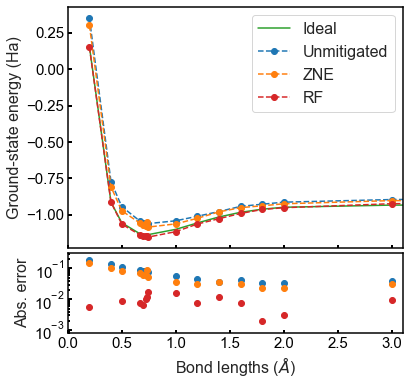

In [125]:
import matplotlib.gridspec as gridspec
import matplotlib as mpl
ms, fs, lw, elw, cs = 9, 16, 2.5, 2, 0
mpl.rc('xtick', labelsize=15)
mpl.rc('ytick', labelsize=15)
mpl.rc('font', weight='normal')

residuals_rf = np.array(rf) - np.array(ideal)
residuals_noisy = np.array(noisy) - np.array(ideal)
residuals_zne = np.array(zne) - np.array(ideal)
fig, ax = plt.subplots(2, 1, figsize=(6,6), gridspec_kw={'height_ratios': [3, 1]})

ax[0].plot(bond_lengths, ideal, label='Ideal', color=colors['Ideal'])
ax[0].plot(bond_lengths, noisy, label='Unmitigated', marker='o', linestyle='dashed', color=colors['Unmitigated'])
ax[0].plot(bond_lengths, zne, label='ZNE', marker='o', linestyle='dashed', color=colors['ZNE'])
ax[0].plot(bond_lengths, rf, label='RF', marker='o', linestyle='dashed', color=colors['RF'])


ax[0].legend(fontsize=fs)
ax[0].set_ylabel('Ground-state energy (Ha)', fontsize=fs)
ax[0].set_xlabel(None)
ax[0].set_xticklabels([])

ax[1].scatter(bond_lengths, np.abs(residuals_rf), color=colors['RF'])
ax[1].scatter(bond_lengths, np.abs(residuals_noisy),  color=colors['Unmitigated'])
ax[1].scatter(bond_lengths, np.abs(residuals_zne), color=colors['ZNE'])
ax[1].axhline(0, color='black', linestyle='--') # add a horizontal line at zero on residual plot
ax[1].set_xlabel(r'Bond lengths ($\AA$)', fontsize=fs)
ax[1].set_ylabel('Abs. error', fontsize=fs)
ax[1].set_yscale('log')
ax[1].set_ylim(10**-3.1, 10**-0.5)
# ax[1].legend(fontsize=fs-4, loc='lower right')

for a in ax:
    a.set_xlim([0, 3.1])
    a.xaxis.set_tick_params(
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True, # labels along the bottom edge are off
    direction='in',
    width=2)
    a.yaxis.set_tick_params(
    which='both',      # both major and minor ticks are affected
    left=True,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    direction='in',
    width=2)
    a.grid(None)
    for axis in ['top','bottom','left','right']:
        a.spines[axis].set_linewidth(1.5)
        a.spines[axis].set_color('black')

plt.subplots_adjust(hspace=0.03)
plt.savefig("/Users/haoranliao/GitHub/blackwater/docs/paper_figures/subfig5_vqe.pdf", dpi=300, bbox_inches='tight', transparent=True)
plt.show()